# Market Basket Analysis

Market Basket Analysis (MBA) adalah implementasi dari fungsi asosiasi pada data mining yang 
berguna untuk menemukan pola asosiasi pada transaksi jual beli. Market Basket Analysis mampu 
menganalisis kebiasaan beli barang oleh konsumen di dalam satu keranjang belanja. Market Basket 
Analysis dapat digunakan dalam memahami pola pembelian barang oleh konsumen dengan output yang 
dihasilkan berupa aturan atau rules, dimana aturan tersebut memuat produk-produk yang saling terkait 
dalam pembelian. 
Terdapat beberapa manfaat dari penggunaan Market Basket Analysis dalam dunia bisnis retail dalam 
menentukan keputusan jual beli, berikut adalah beberapa manfaat yang didapat dari penerapan Market 
Basket Analysis pada bisnis retail.
1. Mengembangkan iklan dan promosi
2. Meningkatkan ukuran dan nilai belanja konsumen
3. Mengetahui Hubungan antar produk
4. Tata letak produk
5. Perilaku konsumen

## Import Library

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-customer-clustering/OnlineRetail.csv


## Import Data

In [3]:
df = pd.read_csv('/kaggle/input/online-retail-customer-clustering/OnlineRetail.csv', encoding="ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


Mengecek dataset yang sudah diimport

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Data Cleaning

In [5]:
# membuang baris yang terdapat nilai null
df = df.dropna(axis=0)
# membuang baris duplikat 
df = df.drop_duplicates(keep='first')
# mengubah semua nama produk(description) berhuruf kecil
df['Description'] = df['Description'].str.lower()
# mengubah tipe data kolom date menjadi datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
# mengubah nilai quantity yang negatif menjadi positif karena nilai negatif tersebut hanya menandakan order tersebut cancelled
df['Quantity'] = df['Quantity'].abs()
# membuat kolom amount yang merupakan perkalian antara quantity dan unitprice
df['Amount'] = df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


Mengecek kembali data setelah dicleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   Amount       401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


# EDA

In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Amount
count,401604.000000,401604,401604.000000,401604.000000,401604.000000
mean,13.542995,2011-07-10 12:08:23.848567552,3.474064,15281.160818,23.644930
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,4.950000
50%,6.000000,2011-07-29 15:40:00,1.950000,15145.000000,11.900000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,250.213145,NaN,69.764035,1714.006089,430.196317


In [8]:
df['Country'].value_counts()

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


Melihat produk mana yang menghasilkan penjualan terbanyak

In [9]:
product = df.groupby('Description').agg({
    'Amount':['sum']
})
product_sorted = product.sort_values(by=('Amount', 'sum'), ascending=False)
product_sorted.head(10)

,Amount
,sum
Description,
"paper craft , little birdie",336939.20
manual,165585.32
medium ceramic top storage jar,158896.37
regency cakestand 3 tier,151961.80
white hanging heart t-light holder,107016.40
postage,88897.68
jumbo bag red retrospot,87024.56
party bunting,69942.03


Hasil visualisasi produk yang menghasilkan penjualan terbanyak

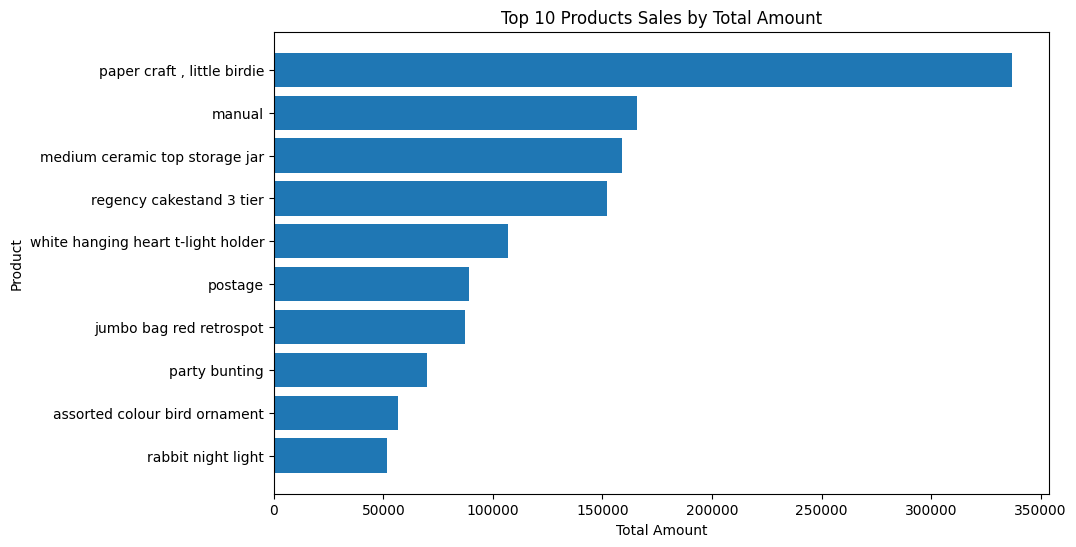

In [10]:
import matplotlib.pyplot as plt

# Ambil 10 produk teratas
top_10_products = product_sorted.head(10)

# Buat bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_products.index, top_10_products[('Amount', 'sum')])
plt.xlabel('Total Amount')
plt.ylabel('Product')
plt.title('Top 10 Products Sales by Total Amount')
plt.gca().invert_yaxis()
plt.show()

Melihat produk yang paling banyak terjual (kuantitas)

In [11]:
product = df.groupby('Description').agg({
    'Quantity':['sum']
})
product_sorted = product.sort_values(by=('Quantity', 'sum'), ascending=False)
product_sorted.head(10)

,Quantity
,sum
Description,
"paper craft , little birdie",161990
medium ceramic top storage jar,152410
world war 2 gliders asstd designs,55519
jumbo bag red retrospot,47193
white hanging heart t-light holder,39284
assorted colour bird ornament,35311
pack of 72 retrospot cake cases,33954
popcorn holder,31346


Hasil visualisasi produk dengan penjualan (kuantitas) terbanyak

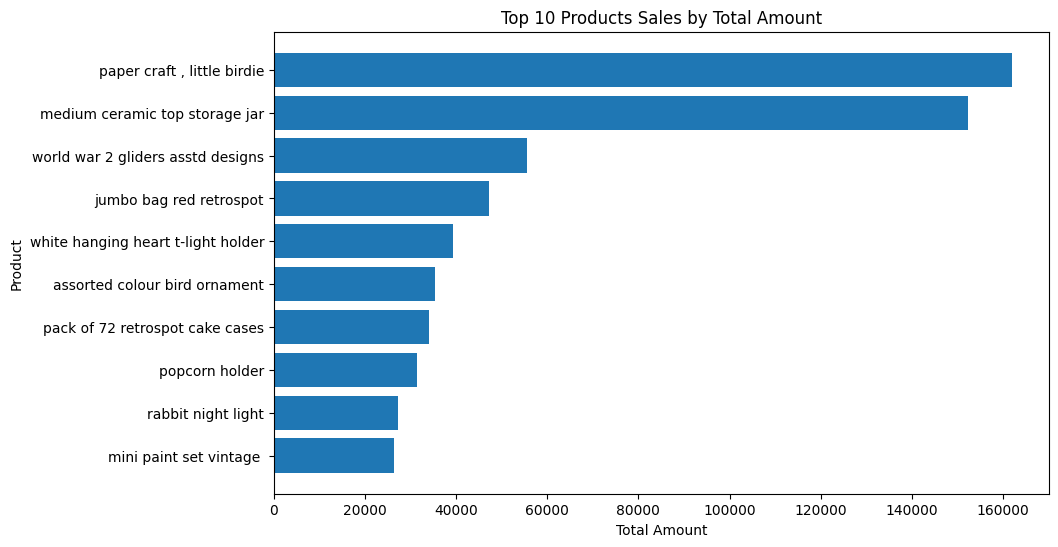

In [12]:
import matplotlib.pyplot as plt

# Ambil 10 produk teratas
top_10_products = product_sorted.head(10)

# Buat bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_products.index, top_10_products[('Quantity', 'sum')])
plt.xlabel('Quantity')
plt.ylabel('Product')
plt.title('Top 10 Products Sold by Quantity')
plt.gca().invert_yaxis()
plt.show()

# Membuat Data Basket

## Buat DataFrame Basket

In [18]:
basket = pd.pivot_table(df, index='InvoiceNo', columns='Description', values='StockCode', aggfunc='nunique', fill_value=0)
basket

Description,4 purple flock dinner candles,50's christmas gift bag large,dolly girl beaker,i love london mini backpack,i love london mini rucksack,nine drawer office tidy,oval wall mirror diamante,red spot gift bag large,set 2 tea towels i love london,spaceboy baby gift set,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
C581499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22190 entries, 536365 to C581569
Columns: 3896 entries,  4 purple flock dinner candles to zinc wire sweetheart letter tray
dtypes: int64(3896)
memory usage: 659.7+ MB


## Encode DataFrame basket dengan nilai True untuk semua nilai di atas 0 dan False untuk semua nilai 0

In [20]:
def encode(x):
    if x==0:
        return False
    if x>0:
        return True

basket_encode = basket.applymap(encode)
basket_encode

Description,4 purple flock dinner candles,50's christmas gift bag large,dolly girl beaker,i love london mini backpack,i love london mini rucksack,nine drawer office tidy,oval wall mirror diamante,red spot gift bag large,set 2 tea towels i love london,spaceboy baby gift set,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C581490,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
C581499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Ambil transaksi dengan banyaknya produk unik lebih dari 1 saja

In [21]:
basket_filter = basket_encode[(basket_encode>0).sum(axis=1)>1]
basket_filter

Description,4 purple flock dinner candles,50's christmas gift bag large,dolly girl beaker,i love london mini backpack,i love london mini rucksack,nine drawer office tidy,oval wall mirror diamante,red spot gift bag large,set 2 tea towels i love london,spaceboy baby gift set,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536370,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C581466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C581468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Mengaplikasikan Apriori Algorithm

## Buat list frequent itemset (kumpulan produk yang sering dibeli)

In [22]:
from mlxtend.frequent_patterns import apriori

frequent_itemset = apriori(basket_filter, min_support=.01, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
frequent_itemset['product_cnt'] = frequent_itemset['itemsets'].apply(lambda x: len(x))
frequent_itemset

,support,itemsets,product_cnt
0,0.105886,(white hanging heart t-light holder),1
1,0.096609,(regency cakestand 3 tier),1
2,0.086586,(jumbo bag red retrospot),1
3,0.073683,(assorted colour bird ornament),1
4,0.073630,(party bunting),1
...,...,...,...
967,0.010023,(herb marker parsley),1
968,0.010023,(herb marker basil),1
969,0.010023,"(hand warmer red retrospot, hand warmer owl de...",2
970,0.010023,"(jumbo bag red retrospot, party bunting)",2


# Mengaplikasikan Association Rules

## Hitung nilai support, confidence, dan lift dari setiap pasangan produk yang mungkin

In [23]:
from mlxtend.frequent_patterns import association_rules

product_association = association_rules(frequent_itemset, metric='confidence', min_threshold=.7).sort_values(['support','confidence'], ascending=[False,False]).reset_index(drop=True)
product_association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(green regency teacup and saucer),(roses regency teacup and saucer ),0.038814,0.043986,0.029697,0.765110,17.394426,0.027990,4.070048,0.980570
1,(pink regency teacup and saucer),(green regency teacup and saucer),0.030870,0.038814,0.025112,0.813472,20.958065,0.023914,5.153024,0.982619
2,(gardeners kneeling pad cup of tea ),(gardeners kneeling pad keep calm ),0.034122,0.040840,0.024845,0.728125,17.828606,0.023452,3.527944,0.977257
3,(pink regency teacup and saucer),(roses regency teacup and saucer ),0.030870,0.043986,0.024046,0.778929,17.708601,0.022688,4.324470,0.973585
4,"(roses regency teacup and saucer , pink regenc...",(green regency teacup and saucer),0.024046,0.038814,0.021167,0.880266,22.678943,0.020233,8.027681,0.979458
5,"(pink regency teacup and saucer, green regency...",(roses regency teacup and saucer ),0.025112,0.043986,0.021167,0.842887,19.162664,0.020062,6.084900,0.972230
6,"(roses regency teacup and saucer , green regen...",(pink regency teacup and saucer),0.029697,0.030870,0.021167,0.712747,23.088567,0.020250,3.373783,0.985969
7,(wooden star christmas scandinavian),(wooden heart christmas scandinavian),0.023193,0.024792,0.017061,0.735632,29.672080,0.016486,3.688830,0.989241
8,"(regency cakestand 3 tier, green regency teacu...",(roses regency teacup and saucer ),0.020420,0.043986,0.016848,0.825065,18.757484,0.015950,5.464976,0.966422
9,"(roses regency teacup and saucer , regency cak...",(green regency teacup and saucer),0.023033,0.038814,0.016848,0.731481,18.845696,0.015954,3.579588,0.969262


## Kesimpulan

**Support**, **Confidence**, dan **Lift** adalah metrik kunci dalam Market Basket Analysis yang membantu dalam mengidentifikasi pola pembelian.

1. **Support**: Support adalah ukuran seberapa sering itemset (kumpulan variasi produk) muncul bersama dalam dataset. Dalam konteks Market Basket Analysis, support dapat dihitung dengan rumus:

    $$\text{Support}(A \rightarrow B) = P(A \cup B)$$

    Di mana \(A\) dan \(B\) adalah itemset dan \(P(A \cup B)\) adalah probabilitas dari gabungan itemset \(A\) dan \(B\).

2. **Confidence**: Confidence adalah ukuran seberapa sering aturan (misalnya, jika membeli item \(A\) maka akan membeli item \(B\)) terbukti benar. Dalam konteks Market Basket Analysis, confidence dapat dihitung dengan rumus:

    $$\text{Confidence}(A \rightarrow B) = \frac{P(A \cup B)}{P(A)}$$

    Di mana \(P(A)\) adalah probabilitas dari itemset \(A\).

3. **Lift (Improvement)**: Lift adalah ukuran seberapa baik aturan dibandingkan dengan kesempatan acak. Dalam konteks Market Basket Analysis, lift dapat dihitung dengan rumus:

    $$\text{Lift}(A \rightarrow B) = \frac{P(A \cup B)}{P(A) \times P(B)}$$

    Di mana \(P(B)\) adalah probabilitas dari itemset \(B\).

Jika nilai lift lebih besar dari 1, maka hasil aturan menjadi lebih baik daripada kesempatan acak dan merupakan hasil yang berguna.


# Insigth & Recommndation

## Rekomendasi Strategi Bisnis Berdasarkan Market Basket Analysis

### Bundling Produk
Jika Perusahaan menemukan bahwa beberapa produk cenderung dibeli bersamaan secara konsisten, pertimbangkan untuk membuat paket bundling atau penawaran khusus yang mencakup kombinasi produk tersebut. Ini dapat mendorong peningkatan penjualan dengan mendorong pelanggan untuk membeli lebih banyak item sekaligus.

### Penempatan Produk yang Tepat
Tempatkan produk yang sering dibeli bersamaan di dekat satu sama lain di dalam toko fisik atau halaman web e-commerce Perusahaan. Ini dapat memudahkan pelanggan menemukan dan membeli produk yang mereka butuhkan, serta meningkatkan kemungkinan pembelian impulsif.

### Cross-Selling dan Up-Selling
Manfaatkan pola pembelian yang ditemukan untuk mendorong cross-selling (penjualan lintas-produk) dan up-selling (penjualan produk dengan nilai lebih tinggi). Misalnya, jika pelanggan sering membeli produk A dan B bersamaan, Perusahaan dapat menawarkan produk C sebagai tambahan dengan diskon atau menawarkan versi premium dari produk tersebut.

### Promosi dan Diskon
Gunakan pola pembelian untuk merancang promosi dan diskon yang sesuai. Berikan diskon khusus untuk pembelian produk dalam kombinasi yang sering terjadi, atau tawarkan diskon kepada pelanggan yang membeli produk tertentu bersamaan.

### Personalisasi Pengalaman Pelanggan
Gunakan data pembelian untuk mempersonalisasi pengalaman pelanggan. Berikan rekomendasi produk yang relevan berdasarkan pembelian sebelumnya, baik melalui email marketing, situs web, atau aplikasi mobile.

### Stok Produk
Pastikan produk yang sering dibeli bersamaan selalu tersedia di stok. Kehabisan salah satu produk bisa berdampak pada penjualan produk lainnya.

### Uji dan Evaluasi
Terus pantau dan evaluasi keberhasilan strategi yang Perusahaan implementasikan berdasarkan insight dari Market Basket Analysis. Lakukan pengujian A/B untuk menilai efektivitas berbagai promosi, bundel produk, atau strategi penempatan.
